In [1]:
# This code includes three regression models (linear, 2nd order polynomial, RandomForest) and compares BigMac
# prices against GDP or log10(GDP) 

In [2]:
# Import depedencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced


# Read the CSV and Perform Basic Data Cleaning

In [3]:
#Load data
file_path = Path('../../Final_Project_Resources/final.csv')
df = pd.read_csv (file_path)
df.head()



,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean


In [4]:
# RAW GDP was converted into log10(GDP) this would be considered as preliminary feature engineering
# Converting to log10(GDP) makes the data more manageable as raw GDP's are spread accross 3-orders of magnitude

In [5]:
# Converting raw GDP to log10 scale
df['GDP_log10'] = np.log10(df['GDP'])

In [6]:
# Checking if the log10(GDP) column was added
df.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand,11.954322
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean,12.206213
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America,12.148268
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean,11.187343


In [7]:
# Checking how the data in the dataframe looks like
df.describe()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,country_code,GDP_log10
count,9.200000e+02,9.200000e+02,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000
mean,1.393870e+04,5.331433e+03,3.567609,2010.279348,3.070198,26113.144578,1.342889e+12,438.443478,11.678427
std,2.225534e+05,8.499408e+04,1.517102,4.525734,3.220871,22923.009189,2.847060e+12,258.334203,0.576048
min,2.040000e+00,1.000000e+00,0.800000,2000.000000,-14.758545,970.941956,2.229865e+10,32.000000,10.348279
25%,4.675000e+00,1.000000e+00,2.497500,2007.000000,1.601224,7495.754301,2.108129e+11,188.000000,11.323895
50%,1.395000e+01,5.000000e+00,3.330000,2012.000000,2.850864,14771.257645,3.945133e+11,416.000000,11.596062
75%,8.550000e+01,3.825000e+01,4.290000,2014.000000,4.789940,46498.842667,1.041007e+12,682.000000,12.017448
max,4.000000e+06,1.600500e+06,11.250000,2016.000000,25.162533,92121.421135,1.784427e+13,858.000000,13.251499


# Using Linear Regression Model using raw GDP

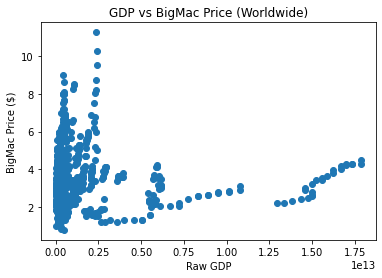

In [8]:
# Ploting the data as a scatter plot using GDP
plt.scatter(df.GDP, df.dollar_price)
plt.xlabel('Raw GDP')
plt.ylabel('BigMac Price ($)')
plt.title('GDP vs BigMac Price (Worldwide)')
plt.show()

In [9]:
# Defining raw GDP as the independant variable (feature)
X =df.GDP.values.reshape(-1,1)
print(X)

[[2.58281789e+11]
 [9.00165538e+11]
 [1.60772927e+12]
 [1.40691400e+12]
 [1.53937081e+11]
 [2.63911219e+12]
 [1.58841360e+11]
 [3.02077924e+11]
 [1.16318945e+11]
 [4.91078136e+11]
 [1.74245451e+11]
 [5.37700713e+12]
 [1.72171423e+11]
 [9.11151774e+11]
 [1.22735468e+11]
 [3.37018207e+11]
 [1.40169822e+11]
 [2.84356443e+11]
 [4.11654200e+11]
 [4.94345122e+11]
 [2.39058712e+11]
 [1.29682627e+13]
 [2.81106256e+11]
 [9.27044119e+11]
 [1.62607071e+12]
 [1.43225105e+12]
 [1.60234720e+11]
 [2.90396301e+12]
 [1.64564397e+11]
 [3.03256205e+11]
 [1.20795619e+11]
 [5.14553484e+11]
 [5.45917963e+12]
 [1.82137564e+11]
 [9.24330515e+11]
 [1.28336006e+11]
 [1.40322359e+11]
 [3.49023978e+11]
 [1.46527654e+11]
 [2.92742339e+11]
 [4.21368319e+11]
 [4.94540767e+11]
 [2.56245431e+11]
 [1.33393120e+13]
 [3.06488952e+11]
 [9.64640422e+11]
 [1.71973181e+12]
 [1.47646830e+12]
 [1.71786906e+11]
 [3.19758920e+12]
 [1.72638854e+11]
 [3.11347745e+11]
 [1.26841340e+11]
 [5.40440021e+11]
 [1.83340728e+11]
 [5.579537

In [10]:
# Defining dollar_price of BigMac as the dependant variable(target)
y= df.dollar_price.values.reshape(-1,1)

In [11]:
# scaler = StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [13]:
# Instantiate linear regression model
model = LinearRegression()

In [14]:
# training the model
model.fit(X,y)

LinearRegression()

In [15]:
y_pred = model.predict(X)

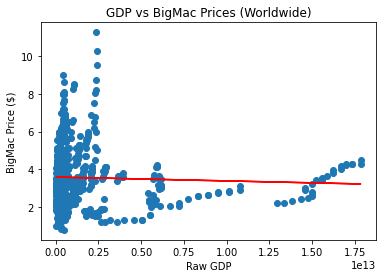

In [16]:
# Scatter plot including the regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('GDP vs BigMac Prices (Worldwide)')
plt.xlabel('Raw GDP')
plt.ylabel('BigMac Price ($)')
plt.show()

In [17]:
# Printing coefficient and y-intercept
print(model.coef_)
print(model.intercept_)

[[-2.0387791e-14]]
[3.59498724]


In [18]:
# R-square for the model
print(model.score(X,y))

0.001463875238819301


# Linear Regression using log10(GDP)

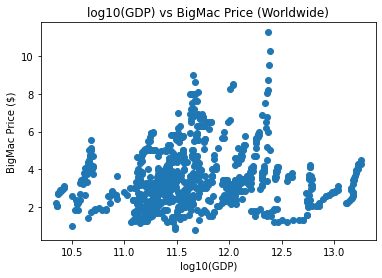

In [19]:
# Ploting the data as a scatter plot using GDP
plt.scatter(df.GDP_log10, df.dollar_price)
plt.xlabel('log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('log10(GDP) vs BigMac Price (Worldwide)')
plt.show()

In [20]:
# Defining log10(GDP) as the independant variable (feature)
X =df.GDP_log10.values.reshape(-1,1)

# Target (y) remains the same as previous
y= df.dollar_price.values.reshape(-1,1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [22]:
# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

y_pred = model.predict(X)



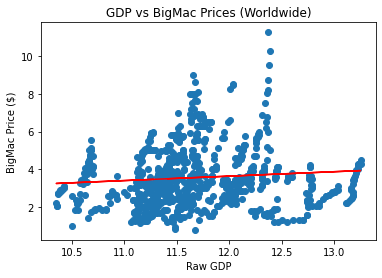

In [23]:
# Scatter plot including the regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('GDP vs BigMac Prices (Worldwide)')
plt.xlabel('Raw GDP')
plt.ylabel('BigMac Price ($)')
plt.show()

In [24]:
# Printing coefficient and y-intercept
print(model.coef_)
print(model.intercept_)

# R-square for the model
print(model.score(X,y))

[[0.23434321]]
[0.83084861]
0.007917580398977386


# Using 2nd order polynomial

In [25]:
# Import dependencies
from sklearn.preprocessing import PolynomialFeatures

# Save an instance of Polynomial Feature and setting it to a second degree
poly_model = PolynomialFeatures(degree=2, include_bias=False)


In [26]:
# Converting X from 1D array to a 2D array, this would give use x and x^2 terms
poly_X = poly_model.fit_transform(X.reshape(-1,1))
poly_X

array([[ 11.41209379, 130.23588458],
       [ 11.95432238, 142.90582362],
       [ 12.20621292, 148.99163382],
       ...,
       [ 13.2514989 , 175.60222313],
       [ 10.70260288, 114.54570831],
       [ 11.27343376, 127.09030869]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(poly_X,y,test_size=0.2, random_state=2)

In [28]:
# Creating Linear Regression instance 
poly_reg_model = LinearRegression()

In [29]:
# training the model
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_predicted = poly_reg_model.predict(X_test)
y_predicted

array([[3.60442127],
       [3.6979403 ],
       [3.43228142],
       [3.76673616],
       [3.61793674],
       [3.84873007],
       [3.72144269],
       [3.73568142],
       [3.38534619],
       [3.8219908 ],
       [3.77499373],
       [3.71248339],
       [3.75815069],
       [3.55509797],
       [3.41711746],
       [3.73234943],
       [3.80574446],
       [3.76577407],
       [3.76304172],
       [2.65186968],
       [3.78073394],
       [3.61131996],
       [3.60842706],
       [3.49426441],
       [3.74224459],
       [3.47355401],
       [3.77596958],
       [3.46830811],
       [3.56704952],
       [3.56044432],
       [3.46996067],
       [3.7697968 ],
       [3.70992125],
       [3.62091158],
       [3.76249653],
       [3.51452657],
       [3.47242388],
       [3.80101885],
       [3.55875773],
       [3.77284651],
       [3.82361949],
       [3.77073909],
       [3.8487145 ],
       [3.82700164],
       [3.43948327],
       [2.59868368],
       [3.77004737],
       [3.460

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
poly_reg_rmse = np.sqrt(mean_squared_error(y_test,
                                          y_predicted))
poly_reg_rmse

1.4954355132576094

In [33]:
# plt.figure(figsize= (10,6))
# plt.title("Polynomial Reg", size=16)
# plt.scatter(X, y)
# plt.plot(X, y_predicted, c='red')
# plt.show()

In [34]:
# 2nd order polynomial using log10(GDP)

In [35]:
# # Save an instance of Polynomial Feature and setting it to a second degree
# poly_model_logGDP = PolynomialFeatures(degree=2, include_bias=False)


# Using RandomForestClassifier

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [37]:
# Defining feature and target
X =df.GDP.values.reshape(-1,1)
y= df.dollar_price

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [39]:
# Creating a StandardScalar instance
scaler = StandardScaler()

# Fitting the Standard Scalar with the training data
X_scalar = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scalar.transform(X_train)
X_test_scaled = X_scalar.transform(X_test)

In [40]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=0)

In [41]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [42]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [43]:
# Calculating the accuracy score
mse = mean_squared_error(y_test, predictions)

rmse = mse**0.5

print(mse)
print(rmse)

2.403143672579611
1.5502076224104986


In [55]:
df_Americas = df.loc[df['region']== 'Americas']

In [65]:
df_Americas.head()# Dropping columns "local_price", "dollar_ex" and those with string values
df_Americas_modified = df_Americas.drop(['date','currency_code', 'Country', 'Code', 'country_code', 
                               'region', 'sub_region', 'local_price', 'dollar_ex'], axis =1)

In [66]:
df_Americas_modified.head()

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2.50,2000,-10.894485,6854.294081,2.582818e+11,11.412094
2,2.95,2000,3.053462,8954.837245,1.607729e+12,12.206213
3,2.85,2000,3.016889,44863.216018,1.406914e+12,12.148268
4,2.45,2000,3.106971,9814.656135,1.539371e+11,11.187343
13,2.32,2000,-0.039844,8960.554086,9.111518e+11,11.959591


In [67]:
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans


In [84]:
# Intializing the model with K =4
model = KMeans(n_clusters=2, random_state=5)
model

KMeans(n_clusters=2, random_state=5)

In [85]:
# Fitting model
model.fit(df_Americas_modified)

KMeans(n_clusters=2, random_state=5)

In [86]:
# Get the predictions
predictions = model.predict(df_Americas_modified)
print(predictions)

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]


In [87]:
# Add a new class column to the df_Americas_modified
df_Americas_modified['class'] = model.labels_
df_Americas_modified.head()

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10,class
0,2.50,2000,-10.894485,6854.294081,2.582818e+11,11.412094,0
2,2.95,2000,3.053462,8954.837245,1.607729e+12,12.206213,0
3,2.85,2000,3.016889,44863.216018,1.406914e+12,12.148268,0
4,2.45,2000,3.106971,9814.656135,1.539371e+11,11.187343,0
13,2.32,2000,-0.039844,8960.554086,9.111518e+11,11.959591,0


In [88]:
# Create a scatterplot of df_Americas_modified
df_Americas_modified.hvplot.scatter(x='GDP_Per_Capita', y='dollar_price', by="class")

:NdOverlay   [class]
   :Scatter   [GDP_Per_Capita]   (dollar_price)

In [91]:
# Plotting the cluster with three features
fig = px.scatter_3d(df_Americas_modified, x="GDP_log10", y="Year",
                   z="dollar_price", color ="class", symbol ="class", size = "dollar_price", width=800)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()